## Homework

> **Note**: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we'll build a model for predicting if we have an image of a bee or a wasp. 
For this, we will use the "Bee or Wasp?" dataset that was obtained from [Kaggle](https://www.kaggle.com/datasets/jerzydziewierz/bee-vs-wasp) and slightly rebuilt. 

You can download the dataset for this homework from [here](https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip):

```bash
wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
unzip data.zip
```

In [1]:
%%capture

!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip
!unzip data.zip

In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch. 

> **Note:** you will need an environment with a GPU for this homework. We recommend to use [Saturn Cloud](https://bit.ly/saturn-mlzoomcamp). 
> You can also use a computer without a GPU (e.g. your laptop), but it will be slower.


### Data Preparation

The dataset contains around 2500 images of bees and around 2100 images of wasps. 

The dataset contains separate folders for training and test sets. 


### Model

For this homework we will use Convolutional Neural Network (CNN). Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

* The shape for input should be `(150, 150, 3)`
* Next, create a convolutional layer ([`Conv2D`](https://keras.io/api/layers/convolution_layers/convolution2d/)):
    * Use 32 filters
    * Kernel size should be `(3, 3)` (that's the size of the filter)
    * Use `'relu'` as activation 
* Reduce the size of the feature map with max pooling ([`MaxPooling2D`](https://keras.io/api/layers/pooling_layers/max_pooling2d/))
    * Set the pooling size to `(2, 2)`
* Turn the multi-dimensional result into vectors using a [`Flatten`](https://keras.io/api/layers/reshaping_layers/flatten/) layer
* Next, add a `Dense` layer with 64 neurons and `'relu'` activation
* Finally, create the `Dense` layer with 1 neuron - this will be the output
    * The output layer should have an activation - use the appropriate activation for the binary classification case

As optimizer use [`SGD`](https://keras.io/api/optimizers/sgd/) with the following parameters:

* `SGD(lr=0.002, momentum=0.8)`

For clarification about kernel size and max pooling, check [Office Hours](https://www.youtube.com/watch?v=1WRgdBTUaAc).


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

In [3]:
import tensorflow as tf
from tensorflow.keras.losses import BinaryCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

print(tf.config.experimental.list_physical_devices())

2023-11-06 20:30:13.263606: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-11-06 20:30:15.006587: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-06 20:30:15.013359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-06 20:30:15.013602: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
!ls './data/train/bee' | head -1

20997149292_3b5fd09795_m.jpg
ls: write error: Broken pipe


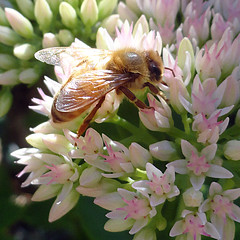

In [128]:
load_img('./data/train/bee/20997149292_3b5fd09795_m.jpg')

In [28]:
def make_model(input_shape: int, learning_rate: float, momentum: float):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(150, 150, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate, momentum = momentum)
    
    model.compile(optimizer = optimizer, 
                  loss = 'binary_crossentropy', 
                  metrics = ['acc'])
    
    return model

In [126]:
input_shape: int = 150
learning_rate: float = 0.002
momentum: float = 0.8

model = make_model(input_shape, learning_rate, momentum)

* `mean squared error`
* **`binary crossentropy`**
* `categorical crossentropy`
* `cosine similarity`

> **Note:** since we specify an activation for the output layer, we don't need to set `from_logits=True`

### Question 2

What's the number of parameters in the convolutional layer of our model? You can use the `summary` method for that.

In [127]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_8 (Dense)             (None, 64)                11214912  
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

* 1 
* 65
* **896**
* 11214912

### Generators and Training

For the next two questions, use the following data generator for both train and test sets:

```python
ImageDataGenerator(rescale=1./255)
```

* We don't need to do any additional pre-processing for the images.
* When reading the data from train/test directories, check the `class_mode` parameter. Which value should it be for a binary classification problem?
* Use `batch_size=20`
* Use `shuffle=True` for both training and test sets. 

For training use `.fit()` with the following params:

```python
model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)
```


In [128]:
train_gen, test_gen = ImageDataGenerator(rescale = 1./255), ImageDataGenerator(rescale = 1./255)

train_ds = train_gen.flow_from_directory(directory='./data/train/', 
                                         target_size=(input_shape, input_shape), 
                                         batch_size=20,
                                         shuffle=True,
                                         class_mode='binary')

test_ds = test_gen.flow_from_directory(directory='./data/test/', 
                                        target_size=(input_shape, input_shape), 
                                        batch_size=20,
                                        shuffle=True,
                                        class_mode='binary')

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [116]:
print(f'{train_ds.class_mode=}')
print(f'{test_ds.class_mode=}')

train_ds.class_mode='binary'
test_ds.class_mode='binary'


In [117]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [118]:
X, y = next(train_ds)
print(X.shape)
print(y.shape)

(20, 150, 150, 3)
(20,)


In [129]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 9s 47ms/step - loss: 0.6957 - acc: 0.5314 - val_loss: 0.6885 - val_acc: 0.5370
Epoch 2/10
184/184 [==============================] - 8s 46ms/step - loss: 0.6852 - acc: 0.5374 - val_loss: 0.6730 - val_acc: 0.5370
Epoch 3/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6676 - acc: 0.5687 - val_loss: 0.6473 - val_acc: 0.6383
Epoch 4/10
184/184 [==============================] - 9s 46ms/step - loss: 0.6381 - acc: 0.6312 - val_loss: 0.5997 - val_acc: 0.6885
Epoch 5/10
184/184 [==============================] - 8s 46ms/step - loss: 0.5964 - acc: 0.6717 - val_loss: 0.6100 - val_acc: 0.6667
Epoch 6/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5644 - acc: 0.7074 - val_loss: 0.5955 - val_acc: 0.6678
Epoch 7/10
184/184 [==============================] - 9s 46ms/step - loss: 0.5377 - acc: 0.7286 - val_loss: 0.5701 - val_acc: 0.7113
Epoch 8/10
184/184 [==============================] - 9s 46ms/step - 

### Question 3

What is the median of training accuracy for all the epochs for this model?

In [110]:
import numpy as np

In [120]:
hist = history.history
np.median(hist['acc'])

0.7990209460258484

* 0.20
* 0.40
* 0.60
* **0.80**

### Question 4

What is the standard deviation of training loss for all the epochs for this model?

In [121]:
np.std(hist['loss'])

0.11149795219217219

* 0.31
* 0.61
* **0.91**
* 1.31

### Data Augmentation

For the next two questions, we'll generate more data using data augmentations. 

Add the following augmentations to your training data generator:

* `rotation_range=50,`
* `width_shift_range=0.1,`
* `height_shift_range=0.1,`
* `zoom_range=0.1,`
* `horizontal_flip=True,`
* `fill_mode='nearest'`

In [130]:
train_gen = ImageDataGenerator(rescale=1./255,
                               rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_ds = train_gen.flow_from_directory(directory='./data/train/', 
                                         target_size=(input_shape, input_shape), 
                                         batch_size=20,
                                         shuffle=True, 
                                         class_mode='binary')

Found 3677 images belonging to 2 classes.


### Question 5 

Let's train our model for 10 more epochs using the same code as previously.
> **Note:** make sure you don't re-create the model - we want to continue training the model
we already started training.

What is the mean of test loss for all the epochs for the model trained with augmentations?

In [131]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
184/184 [==============================] - 23s 126ms/step - loss: 0.5262 - acc: 0.7484 - val_loss: 0.5312 - val_acc: 0.7593
Epoch 2/10
184/184 [==============================] - 23s 126ms/step - loss: 0.5243 - acc: 0.7547 - val_loss: 0.5093 - val_acc: 0.7603
Epoch 3/10
184/184 [==============================] - 23s 127ms/step - loss: 0.5087 - acc: 0.7601 - val_loss: 0.5275 - val_acc: 0.7484
Epoch 4/10
184/184 [==============================] - 23s 125ms/step - loss: 0.5013 - acc: 0.7702 - val_loss: 0.4923 - val_acc: 0.7723
Epoch 5/10
184/184 [==============================] - 23s 126ms/step - loss: 0.5056 - acc: 0.7558 - val_loss: 0.4929 - val_acc: 0.7593
Epoch 6/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4944 - acc: 0.7702 - val_loss: 0.5173 - val_acc: 0.7484
Epoch 7/10
184/184 [==============================] - 23s 126ms/step - loss: 0.4879 - acc: 0.7721 - val_loss: 0.5132 - val_acc: 0.7560
Epoch 8/10
184/184 [==============================] - 2

In [132]:
import matplotlib.pyplot as plt

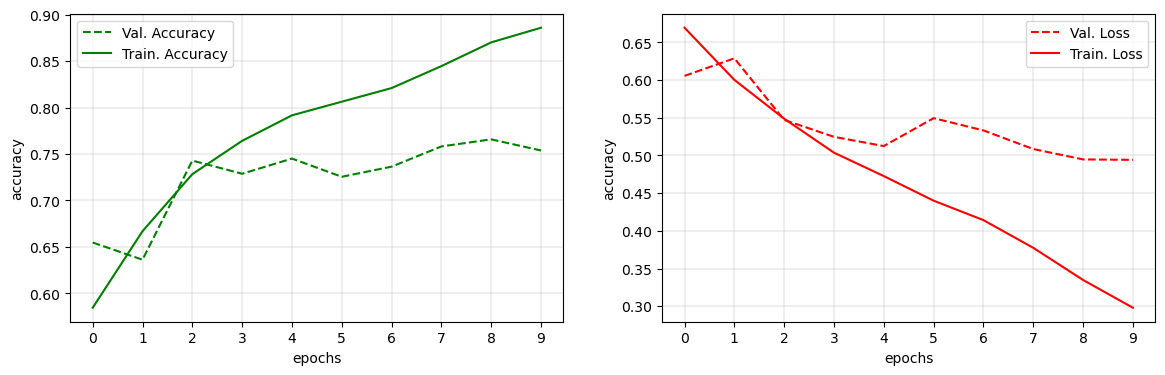

In [133]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(hist['val_acc'], 'g--', label='Val. Accuracy')
plt.plot(hist['acc'], 'g-', label='Train. Accuracy')
plt.xticks(range(10))
plt.grid(lw=.3)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist['val_loss'], 'r--', label='Val. Loss')
plt.plot(hist['loss'], 'r-', label='Train. Loss')
plt.xticks(range(10))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid(lw=.3)
plt.legend()

In [134]:
np.mean(hist['val_loss'])

0.5398650795221329

* 0.18
* **0.48**
* 0.78
* 0.108

### Question 6

What's the average of test accuracy for the last 5 epochs (from 6 to 10)
for the model trained with augmentations?

In [135]:
np.mean(hist['val_acc'][-5:])

0.7479302883148193

* 0.38
* 0.58
* **0.78**
* 0.98

## Submit the results

- Submit your results here: https://forms.gle/5sjtM3kzY9TmLmU17
- If your answer doesn't match options exactly, select the closest one
- You can submit your solution multiple times. In this case, only the last submission will be used


## Deadline

The deadline for submitting is November 20 (Monday), 23:00 CEST. After that the form will be closed.